In [1]:
# =========================================
# librerias
# =========================================
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
datos = pd.read_csv(filepath_or_buffer="C:/Users/jenif/Downloads/samsung.csv")

In [3]:
datos

,Date,Close,Volume
0,02/01/2008,10880,18047200
1,03/01/2008,10920,19346500
2,04/01/2008,10780,17997350
3,07/01/2008,10380,39787200
4,08/01/2008,10320,24783700
...,...,...,...
2845,24/06/2019,45500,6085066
2846,25/06/2019,45600,7076774
2847,26/06/2019,45700,9226097
2848,27/06/2019,46500,12603534


In [4]:
# -----------------------------------------
# 2) Preprocesamiento
# -----------------------------------------
# Nos quedamos solo con columnas numéricas
X = datos.select_dtypes(include=[np.number])

# Escalar datos para que todas las variables tengan misma importancia
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


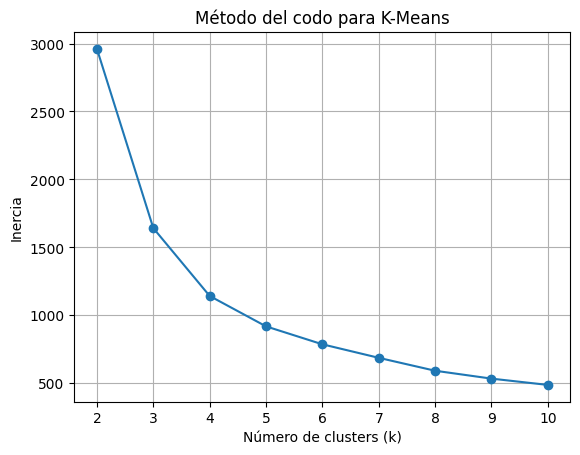

In [5]:
# -----------------------------------------
# 3) Elección de número de clusters (método del codo)
# -----------------------------------------
inercia = []
K_range = range(2, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inercia.append(km.inertia_)

plt.figure()
plt.plot(K_range, inercia, marker="o")
plt.title("Método del codo para K-Means")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.grid(True)
plt.show()

# Para el ejemplo elegimos k=3 
k_opt = 3
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

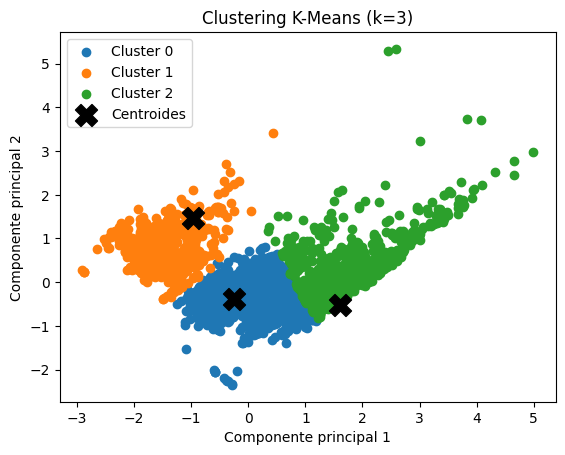

In [6]:
# -----------------------------------------
# 4) Visualización con reducción PCA
# -----------------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure()
for cluster in range(k_opt):
    plt.scatter(
        X_pca[labels == cluster, 0],
        X_pca[labels == cluster, 1],
        label=f"Cluster {cluster}"
    )

plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1],
    s=250, c="black", marker="X", label="Centroides"
)
plt.title(f"Clustering K-Means (k={k_opt})")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.show()

In [7]:
# -----------------------------------------
# 5) Guardar modelo
# -----------------------------------------
import joblib
os.makedirs("model", exist_ok=True)
model_path = os.path.join("model", "kmeans_samsung.pkl")
joblib.dump(kmeans, model_path)
print(f"Modelo guardado en: ")

Modelo guardado en: 
